In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
sns.set()

IMPORTING THE DATA

In [2]:
data = pd.read_csv('data.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


CHECKING DATA TYPES

In [3]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

CHECKING THE PRESENCE OF NULL VALUES

In [4]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

OBSERVING THE DATA PROPERTIES TO CHECK FOR INCORRECT DATA

In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


SEEING FREQUENCY DISTRIBUTION HISTOGRAMS OF THE DATA GIVEN IN ORDER TO OBSERVE ANY OUTLIERS

(array([719., 359., 272., 212., 155., 113.,  85.,  43.,  30.,  12.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

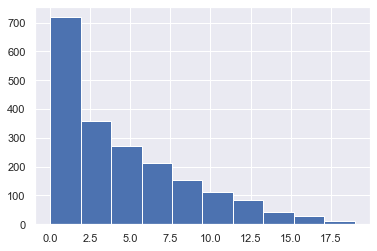

In [6]:
plt.hist(data['fc'])

SETTING THE INDEPENDENT AND DEPENDENT VARIABLES

SPLITTING THE DATA INTO THE TRAINING AND TESTING SET

In [7]:
y = data['price_range']
x = data.iloc[:,:-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

SCALING THE DATA FOR ACCURATE ANALYSIS

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

LOGISTIC REGRESSION MODEL

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
model.fit(X_scaled_train, y_train)

LogisticRegression(max_iter=3000)

In [10]:
y_hat = model.predict(X_scaled_test)

In [11]:
model.score(X_scaled_test,y_test)

0.946969696969697

In [12]:
print(confusion_matrix(y_test,y_hat))
print(classification_report(y_test,y_hat))

[[153   5   0   0]
 [  4 146   2   0]
 [  0  13 176  10]
 [  0   0   1 150]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.89      0.96      0.92       152
           2       0.98      0.88      0.93       199
           3       0.94      0.99      0.96       151

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



K-TH NEAREST NEIGHBORS MODEL

Choosing a K Value


Text(0, 0.5, 'Error Rate')

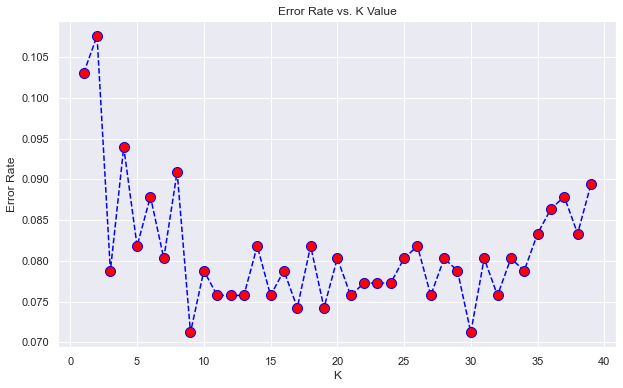

In [13]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error.append(np.mean(prediction_i != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can observe that at about K = 15 the error rate seems to be almost constant

In [24]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9242424242424242


In [25]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 169  13]
 [  0   0  10 141]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.92       151

    accuracy                           0.92       660
   macro avg       0.92      0.93      0.93       660
weighted avg       0.92      0.92      0.92       660



SUPPORT VECTOR MACHINE MODEL

1. LINEAR MODEL

In [26]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)


In [27]:
classifier.score(X_test,y_test)

0.9666666666666667

In [28]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[156   2   0   0]
 [  1 148   3   0]
 [  0   7 189   3]
 [  0   0   6 145]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.94      0.97      0.96       152
           2       0.95      0.95      0.95       199
           3       0.98      0.96      0.97       151

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



2. RBF MODEL

In [29]:
from sklearn.svm import SVC

classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)


In [30]:
classifier2.score(X_test,y_test)

0.946969696969697

In [31]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[156   2   0   0]
 [  6 145   1   0]
 [  0  14 177   8]
 [  0   0   4 147]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.90      0.95      0.93       152
           2       0.97      0.89      0.93       199
           3       0.95      0.97      0.96       151

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



THE LINEAR MODEL OF SUPPORT VECTOR MACHINE GIVES THE MOST ACCURATE RESULTS